In [1]:
import pandas as pd
import numpy as np
import pickle
import time

import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import CoherenceModel, LdaModel, HdpModel

In [2]:
# CLEANED AND PROCESSED DATA PULL - processed abstracts are in docs column.  

# import NSF data
#f = open('../../data/prd/RND Topic Modelling/nsf_stanford_lemma.sav', 'rb')

# import entire dataset
f = open('../../data/prd/RND Topic Modelling/lda_data_stanford_lemma.sav', 'rb')

[corpus, id2word, docs] = pickle.load(f)
f.close()

# corpus - word frequency in docs
# id2word - dictionary
# docs - lemmatized abstracts


In [4]:
# code in this and next 2 cells: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/topic_coherence_tutorial.ipynb

t1 = time.time()
hdp_model = HdpModel(corpus=corpus, id2word=id2word, random_state=1)
t2 = time.time()

print("Time = ", t2-t1, "seconds")

Time =  765.054119348526 seconds


In [5]:
# To get the topic words from the model
topics = []
for topic_id, topic in hdp_model.show_topics(num_topics=150, formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)
topics[:2]

[['model',
  'data',
  'material',
  'application',
  'design',
  'method',
  'base',
  'problem',
  'technology',
  'work',
  'network',
  'program',
  'development',
  'propose',
  'structure',
  'process',
  'theory',
  'field',
  'property',
  'energy'],
 ['program',
  'stem',
  'support',
  'engineering',
  'community',
  'education',
  'learn',
  'data',
  'development',
  'design',
  'technology',
  'conference',
  'work',
  'graduate',
  'base',
  'researcher',
  'school',
  'field',
  'faculty',
  'workshop']]

In [6]:
# Initialize CoherenceModel using `topics` parameter
cm = CoherenceModel(topics=topics, corpus=corpus, dictionary=id2word, texts=docs, coherence='c_v')
cm.get_coherence()

0.42337938728772107

In [10]:
hdp_tc = cm.get_coherence_per_topic(with_std=True)

In [11]:
hdp_tc

[(0.28020844678890267, 0.11467165289605327),
 (0.4704875664467588, 0.2155266172996179),
 (0.29891901568232127, 0.17912342645565826),
 (0.2983673729776591, 0.13327824293211607),
 (0.24432007031319652, 0.1754247565214485),
 (0.5386579575001667, 0.19821274435093722),
 (0.32888301302031925, 0.4789163303770446),
 (0.24614555913105973, 0.05585285973706603),
 (0.3133025157658781, 0.24769423860623715),
 (0.3151109092029156, 0.12862770310489824),
 (0.3631625839247262, 0.1798824809005709),
 (0.4144227830643496, 0.20256316601972335),
 (0.26681137842248537, 0.23076548292074578),
 (0.21741050100761225, 0.2154336485320194),
 (0.3621594114867851, 0.2418617836555073),
 (0.2234571304152187, 0.12752109810412116),
 (0.3914964092903201, 0.3377131889674324),
 (0.2251068798544244, 0.13120488358928006),
 (0.24685146397261012, 0.14945040260330616),
 (0.3150472063404083, 0.20274750761695023),
 (0.3340471089906841, 0.10343022678841612),
 (0.29047934062370073, 0.1178912039187605),
 (0.3391878920492666, 0.2152727

In [12]:
hdp_tc_plot = cm.get_coherence_per_topic()

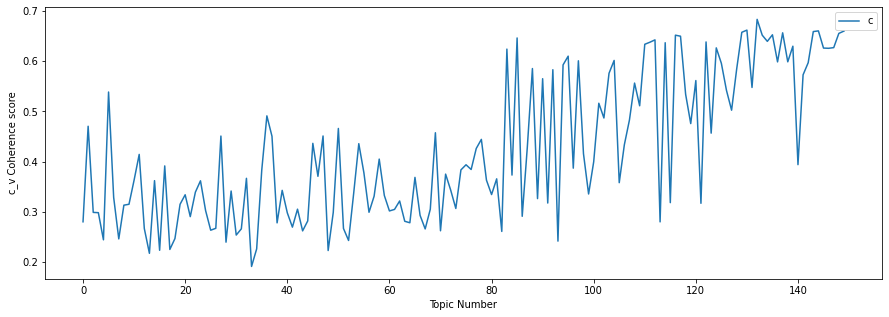

In [16]:
# plot 
x = np.linspace(0,149,150)

plt.figure(figsize=(15,5))
plt.plot(x, hdp_tc_plot)
plt.xlabel("Topic Number")
plt.ylabel("c_v Coherence score")
plt.legend(("coherence_values"), loc='best')

In [7]:
len(topics)

150

In [19]:
topics

[['material',
  'model',
  'process',
  'program',
  'cell',
  'development',
  'work',
  'data',
  'understand',
  'undergraduate',
  'base',
  'structure',
  'change',
  'impact',
  'field',
  'property',
  'graduate',
  'technology',
  'method',
  'design'],
 ['data',
  'model',
  'design',
  'network',
  'problem',
  'method',
  'application',
  'base',
  'work',
  'analysis',
  'process',
  'information',
  'large',
  'development',
  'technology',
  'impact',
  'time',
  'propose',
  'understand',
  'approach'],
 ['program',
  'stem',
  'support',
  'engineering',
  'education',
  'development',
  'community',
  'learn',
  'field',
  'conference',
  'graduate',
  'work',
  'school',
  'data',
  'design',
  'technology',
  'base',
  'researcher',
  'model',
  'undergraduate'],
 ['program',
  'support',
  'university',
  'year',
  'nsf',
  'stem',
  'instrumentation',
  'mathematical',
  'base',
  'share',
  'researcher',
  'make',
  'community',
  'teacher',
  'graduate',
  'host'

In [8]:
hdp_model.print_topics(num_topics=150, num_words=10)

[(0,
  '0.007*model + 0.006*data + 0.006*material + 0.005*application + 0.005*design + 0.004*method + 0.004*base + 0.004*problem + 0.004*technology + 0.004*work'),
 (1,
  '0.011*program + 0.008*stem + 0.007*support + 0.007*engineering + 0.006*community + 0.006*education + 0.006*learn + 0.006*data + 0.006*development + 0.005*design'),
 (2,
  '0.006*model + 0.006*process + 0.004*program + 0.004*material + 0.004*data + 0.004*chemical + 0.004*cell + 0.004*work + 0.004*surface + 0.004*water'),
 (3,
  '0.006*data + 0.005*change + 0.005*model + 0.005*specie + 0.004*plant + 0.004*understand + 0.004*community + 0.003*process + 0.003*social + 0.003*work'),
 (4,
  '0.001*zeolite + 0.001*site + 0.001*program + 0.001*mathematical + 0.001*useful + 0.001*synthesis + 0.001*method + 0.001*child + 0.001*material + 0.001*model'),
 (5,
  '0.002*teacher + 0.002*program + 0.001*development + 0.001*year + 0.001*school + 0.001*support + 0.001*mathematical + 0.001*leader + 0.001*base + 0.001*stem'),
 (6,
  '0.

In [27]:
TT = hdp_model.get_topics()

In [29]:
TT

array([[7.65627107e-04, 5.16507318e-05, 2.44893872e-03, ...,
        1.78768318e-08, 1.56071278e-08, 9.23699115e-09],
       [8.30219895e-04, 5.92752012e-05, 1.77776592e-03, ...,
        7.28073499e-07, 6.98473383e-07, 7.23347355e-07],
       [6.33680009e-04, 3.81443823e-04, 3.67043794e-03, ...,
        2.60579549e-07, 2.82679445e-07, 2.56115833e-07],
       ...,
       [1.01439738e-05, 1.08949992e-06, 1.93960972e-05, ...,
        3.94777532e-06, 3.65251357e-05, 4.04612870e-06],
       [3.08885716e-05, 3.28450909e-06, 1.05726048e-05, ...,
        1.89751516e-05, 6.93014948e-05, 1.64682679e-05],
       [5.55045438e-05, 2.59005632e-05, 2.61140692e-05, ...,
        1.30015777e-05, 1.02386817e-05, 2.94813064e-05]])

In [30]:
TT.shape

(150, 58237)